# Importing necessary libraries

In [68]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Reading Data

In [69]:
df = pd.read_csv(r"C:\Users\ajayk\Desktop\Machine Learning\Machine-Learning\Malware-Detection\ClaMP_Integrated-5184.csv")
df

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,256,4,1,0,1,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,144,3,4,65535,184,184,4,1,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,144,3,4,65535,184,272,5,1,0,1,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,144,3,4,65535,184,184,1,1,0,1,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,144,3,4,65535,184,224,5,1,0,1,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,144,3,4,65535,184,216,5,1,1,1,...,0,5,0,NoPacker,6.174602,3.155928,365568,7.546568,0,1
5206,80,2,4,65535,184,256,7,1,0,1,...,4,3,0,NoPacker,0.000000,0.000000,98816,6.947195,0,1
5207,144,3,4,65535,184,216,5,1,0,1,...,2,3,0,NoPacker,6.503422,3.790871,227328,7.823114,0,1
5208,144,3,4,65535,184,248,5,1,1,1,...,1,4,0,NoPacker,6.115208,7.919091,271616,7.886012,0,1


In [70]:
df_integ_data = pd.read_csv((r"C:\Users\ajayk\Desktop\Machine Learning\Machine-Learning\Malware-Detection\ClaMP_Integrated-5184.csv"), skip_blank_lines=True, na_filter=False, encoding='utf-8')

print('Total Shape :',df_integrated_data.shape)

Total Shape : (5210, 69)


In [71]:
df_integ_data.head()

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,sus_sections,non_sus_sections,packer,packer_type,E_text,E_data,filesize,E_file,fileinfo,class
0,144,3,4,65535,184,256,4,1,0,1,...,1,3,0,NoPacker,6.603616,5.443362,1181520,6.627552,1,0
1,144,3,4,65535,184,184,4,1,0,1,...,1,3,0,NoPacker,5.205926,2.123522,7680,5.318221,0,0
2,144,3,4,65535,184,272,5,1,0,1,...,1,4,0,NoPacker,6.238000,3.380859,57872,6.507758,1,0
3,144,3,4,65535,184,184,1,1,0,1,...,0,1,0,NoPacker,0.000000,0.000000,95616,4.575092,1,0
4,144,3,4,65535,184,224,5,1,0,1,...,1,4,0,NoPacker,6.355626,0.702621,48128,5.545531,1,0


# Checking columns and their data type

In [72]:
for col in df_integ_data.columns:
  print('COLUMN:', col, 'DATA_TYPE:', df_integ_data[col].dtype, 'UNIQUE_VAL:', df_integ_data[col].nunique())

COLUMN: e_cblp DATA_TYPE: int64 UNIQUE_VAL: 10
COLUMN: e_cp DATA_TYPE: int64 UNIQUE_VAL: 8
COLUMN: e_cparhdr DATA_TYPE: int64 UNIQUE_VAL: 4
COLUMN: e_maxalloc DATA_TYPE: int64 UNIQUE_VAL: 4
COLUMN: e_sp DATA_TYPE: int64 UNIQUE_VAL: 10
COLUMN: e_lfanew DATA_TYPE: int64 UNIQUE_VAL: 41
COLUMN: NumberOfSections DATA_TYPE: int64 UNIQUE_VAL: 22
COLUMN: CreationYear DATA_TYPE: int64 UNIQUE_VAL: 2
COLUMN: FH_char0 DATA_TYPE: int64 UNIQUE_VAL: 2
COLUMN: FH_char1 DATA_TYPE: int64 UNIQUE_VAL: 1
COLUMN: FH_char2 DATA_TYPE: int64 UNIQUE_VAL: 2
COLUMN: FH_char3 DATA_TYPE: int64 UNIQUE_VAL: 2
COLUMN: FH_char4 DATA_TYPE: int64 UNIQUE_VAL: 2
COLUMN: FH_char5 DATA_TYPE: int64 UNIQUE_VAL: 2
COLUMN: FH_char6 DATA_TYPE: int64 UNIQUE_VAL: 2
COLUMN: FH_char7 DATA_TYPE: int64 UNIQUE_VAL: 2
COLUMN: FH_char8 DATA_TYPE: int64 UNIQUE_VAL: 2
COLUMN: FH_char9 DATA_TYPE: int64 UNIQUE_VAL: 2
COLUMN: FH_char10 DATA_TYPE: int64 UNIQUE_VAL: 2
COLUMN: FH_char11 DATA_TYPE: int64 UNIQUE_VAL: 1
COLUMN: FH_char12 DATA_TYPE: 

# Checking null values on each column in the dataset

In [73]:
df_integ_data.isna().sum()/len(df_integrated_data)*100

e_cblp        0.0
e_cp          0.0
e_cparhdr     0.0
e_maxalloc    0.0
e_sp          0.0
             ... 
E_data        0.0
filesize      0.0
E_file        0.0
fileinfo      0.0
class         0.0
Length: 70, dtype: float64

# Checking class classification (1= malware, 0=benign)

In [74]:
df_integ_data['class'].value_counts()

1    2722
0    2488
Name: class, dtype: int64

# Plot the class of dataset

<Axes: >

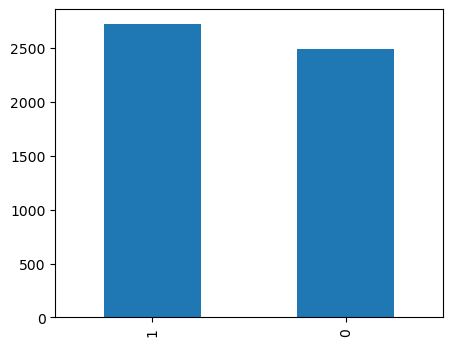

In [75]:
fig = plt.figure(figsize=(5, 4))
df_integ_data['class'].value_counts().plot(kind='bar')

# Change column 'packer_type' to 'pt_num' with the appropriate integer

In [76]:
number = df_integ_data['packer_type'].unique()
p_types = {number[i] : i for i in range(len(number))}
temp = []
for n in df_integ_data['packer_type']:
    temp.append(p_types[n])
df_integ_data['pt_num'] = temp
y = df_integ_data.pop('class')
df_integ_data.pop('packer_type')

0       NoPacker
1       NoPacker
2       NoPacker
3       NoPacker
4       NoPacker
          ...   
5205    NoPacker
5206    NoPacker
5207    NoPacker
5208    NoPacker
5209    NoPacker
Name: packer_type, Length: 5210, dtype: object

# Split dataset for training and testing

In [80]:
x_train, x_test, y_train, y_test = train_test_split(
    df_integ_data, y,test_size=0.3, random_state=0)

In [81]:
x_train

,e_cblp,e_cp,e_cparhdr,e_maxalloc,e_sp,e_lfanew,NumberOfSections,CreationYear,FH_char0,FH_char1,...,LoaderFlags,sus_sections,non_sus_sections,packer,E_text,E_data,filesize,E_file,fileinfo,pt_num
1277,144,3,4,65535,184,272,5,1,0,1,...,1,1,4,0,6.489412,5.069442,2409848,5.473367,1,0
2947,80,2,4,65535,184,256,8,1,0,1,...,1,4,4,1,0.000000,0.000000,407040,6.433054,0,7
5185,80,2,4,65535,184,256,3,1,1,1,...,1,2,1,1,0.000000,0.000000,26624,7.688646,0,10
4271,144,3,4,65535,184,128,6,1,1,1,...,1,0,6,0,4.904605,0.582157,61440,6.588452,0,0
4377,144,3,4,65535,184,200,4,1,1,1,...,1,1,3,0,7.566706,7.997042,321536,7.726566,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,80,2,4,65535,184,256,9,1,0,1,...,1,2,7,0,6.488600,2.669341,121856,6.467731,0,0
3264,144,3,4,65535,184,184,3,1,1,1,...,1,2,1,1,0.000000,0.000000,1497088,7.998952,0,10
1653,144,3,4,65535,184,224,5,1,0,1,...,1,1,4,0,6.362728,5.400373,493568,6.185875,1,0
2607,144,3,4,65535,184,232,5,1,0,1,...,1,0,5,0,5.949977,7.825208,344064,7.118623,1,0


In [82]:
y_train

1277    0
2947    1
5185    1
4271    1
4377    1
       ..
4931    1
3264    1
1653    0
2607    1
2732    1
Name: class, Length: 3647, dtype: int64